# ESILV - Python for data analysis - project 2022

In [2]:
#Import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn as sns

In [3]:
#Charge the Dataset
df = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 1) Clear Data

Dataset : 1 years of rented bike

Target : Have the good renter number of bike by hours so we going to try linear regression

In [4]:
#Check is Nan value in the dataframe
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [5]:
#transform quantitative variable to vector
df['Functioning Day'].unique()
df['Functioning Day'] = df['Functioning Day'].replace(to_replace=['No', 'Yes'], value=[0, 1])

df['Holiday'].unique()
df['Holiday'] = df['Holiday'].replace(to_replace=['No Holiday', 'Holiday'], value=[0, 1])

df['Seasons'].unique()
df['Seasons'] = df['Seasons'].replace(to_replace=['Winter', 'Spring', 'Summer', 'Autumn'], value=[0, 1, 2, 3])

In [6]:
#Create day, month, years columns
df['years'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

In [7]:
#Verif type of columns
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                        int64
Holiday                        int64
Functioning Day                int64
years                          int64
month                          int64
day                            int64
dtype: object

In [8]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,years,month,day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,1,12
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,1,12
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,2017,1,12
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,1,12
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,2017,1,12


In [9]:
#Create of a correlation array
df.corr().style.background_gradient(cmap='Blues')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,years,month,day
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.359687,-0.072338,0.203943,0.215162,0.070861,0.046849
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-0.000000,0.000000,0.005439,0.000000,0.000000,0.000000
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.591545,-0.055931,-0.050170,0.377796,0.049683,0.080908
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.189238,-0.050278,-0.020800,0.035925,0.047798,0.007047
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.166834,0.023017,0.005037,-0.003781,-0.082069,-0.061234
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.111974,0.031773,-0.026000,0.052381,0.077888,-0.106859
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.582418,-0.066759,-0.052837,0.336350,0.065101,0.069708
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.094681,-0.005077,-0.007665,0.128086,-0.030412,-0.003446
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.033453,-0.014269,0.002055,0.027522,-0.022794,0.011998
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.145457,-0.012591,0.032089,-0.206418,0.054758,0.101435


In [10]:
#Create Second Data set without no correlation columns
#TO DO
df2 = df.copy()
df2 = df2.drop(['Holiday'], axis = 1)
df2 = df2.drop(['years'], axis = 1)
df2 = df2.drop(['Snowfall (cm)'], axis = 1)
df2 = df2.drop(['Rainfall(mm)'], axis = 1)
df2 = df2.drop(['Humidity(%)'], axis = 1)

# 2) Data-visualization

In [11]:
#We create sum dataframe for scattler plot
dfDay = df.groupby('Date').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean'],'month':['mean']})
dfDay.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Date,,,,,,,,,,,,,
01/01/2018,4290,-1.283333,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.000000,0.000000,0,1,1.0,1
01/02/2018,5377,-3.866667,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.000000,0.904167,0,0,1.0,1
01/03/2018,5132,0.450000,64.208333,3.554167,1084.000000,-6.387500,0.747500,0.104167,0.000000,1,1,1.0,1
01/04/2018,17388,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.000000,1,0,1.0,1
01/05/2018,26820,20.341667,72.791667,1.437500,456.458333,15.120833,0.517500,0.000000,0.000000,1,1,1.0,1


In [12]:
#We create sum dataframe for scattler plot
dfHour = df.groupby('Hour').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfHour.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hour,,,,,,,,,,,,
0,197633,11.286301,64.997260,1.453699,1433.380822,4.543014,0.0,0.145205,0.061644,1.50411,0.049315,0.964384
1,155557,10.923288,66.128767,1.284110,1414.813699,4.470959,0.0,0.062192,0.073699,1.50411,0.049315,0.964384
2,110095,10.591507,67.306849,1.223836,1382.597260,4.438904,0.0,0.096986,0.076438,1.50411,0.049315,0.964384
3,74216,10.293699,68.136986,1.197534,1358.635616,4.402740,0.0,0.146849,0.076712,1.50411,0.049315,0.964384
4,48396,10.026301,68.731507,1.217260,1339.284932,4.308219,0.0,0.155616,0.076438,1.50411,0.049315,0.964384


In [13]:
dfMonth = dfDay.groupby('month').agg({'Rented Bike Count': ['mean'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfMonth

ValueError: Grouper for 'month' not 1-dimensional

In [ ]:
dfDay.plot(y="Rented Bike Count",linestyle="",marker=".",markersize=1)

We can see that during winter there are less bykes that are used.

<AxesSubplot:xlabel='Hour'>

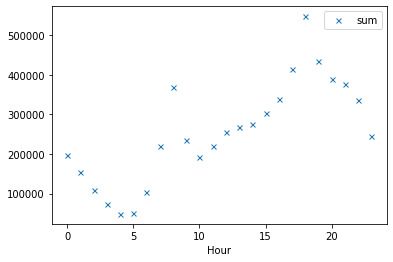

In [14]:
dfHour.plot(y="Rented Bike Count",linestyle="",marker="x",markersize=5)

In [15]:
dfMonth.plot(y="Rented Bike Count",linestyle="",marker="x",markersize=5)

NameError: name 'dfMonth' is not defined

In [16]:
#Delete Date
df = df.drop(['Date'], axis = 1)
df2 = df2.drop(['Date'], axis = 1)

In [17]:
#Import for KNN method
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

x = df.drop(['Rented Bike Count'], axis = 1)
y = df["Rented Bike Count"]

x2 = df2.drop(['Rented Bike Count'], axis = 1)

In [18]:
#We have lot possible of result in this data set so we need a seconds method for compare all posibilities methods
#Function which return a good prediction if the absolute results is inferior at 5
def ApproxAccuracy(result, predict):
    predict = pd.Series(predict) 
    FusionDf = pd.DataFrame(result.subtract(predict, fill_value=0).abs())
    FusionDfRestant = FusionDf.loc[(FusionDf[0] <= 5)]
    return (len(FusionDfRestant) * 100) / len(FusionDf)
    

In [19]:
#KNN Model 1
KnnModel1 = KNeighborsClassifier(n_neighbors=2)
KnnModel1.fit(x,y)
KnnModel1.score(x,y)
#Exact accuracy with model 1 : 51.0958904109589 %

predict_KnnModel1 = KnnModel1.predict(x)
ApproxAccuracy(y, predict_KnnModel1)
#ApproxAccuracy with model 1 : 52.5684931506849%

52.56849315068493

In [20]:
#KNN Model 2
KnnModel2 = KNeighborsClassifier(n_neighbors=2)
KnnModel2.fit(x2,y)
KnnModel2.score(x2,y)
#Exact accuracy with model 1 : 51.05022831050229%

predict_KnnModel2 = KnnModel2.predict(x2)
ApproxAccuracy(y, predict_KnnModel2)
#ApproxAccuracy with model 1 : 52.31735159817351%

52.317351598173516

In [21]:
#Import for linear model
from sklearn.linear_model import LinearRegression

In [22]:
#Linear Regression model 1
LinearReg1 = LinearRegression().fit(x, y)
LinearReg1.score(x, y)
#Exact accuracy with model 1 : 54,50240556515916%

predict_LinearReg1 = LinearReg1.predict(x)
ApproxAccuracy(y, predict_LinearReg1)
#ApproxAccuracy with model 1 : 1.1187214611872147% ???????????????????

1.1187214611872147

In [23]:
#Linear Regression model 2
LinearReg2 = LinearRegression().fit(x2, y)
LinearReg2.score(x2, y)
#Exact accuracy with model 2 : 0.5256651814956462

predict_LinearReg2 = LinearReg2.predict(x2)
ApproxAccuracy(y, predict_LinearReg2)
#ApproxAccuracy with model 1 : 1.1187214611872147% ???????????????????

1.1187214611872147

In [24]:
#Conclusion first test : 
# => we keep only the first model for the next steps
# => Thanks to our function, we can see that the missed predictions seem far from the real value

In [25]:
#Create train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)                 # Il ne faut fiter que sur les data d'entrainement
x_train = scaler.transform(x_train, copy = False)
x_test  = scaler.transform(x_test, copy = False)

In [32]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import cross_val_score
cross_val_score(svr, x_train, y_train, n_jobs=-1)

array([0.48364321, 0.4836191 , 0.51051552, 0.49118697, 0.45928922])

In [34]:
#Sharpen grid search
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':[0.01, 0.025, 0.05, 0.75, 0.1, 0.25, 0.5, 0.7]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
grid.best_score_, grid.best_estimator_
#gamma = 0.1

(0.2685933819644884, SVR(gamma=0.05))

In [35]:
#Sharpen grid search
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':[0.03, 0.04, 0.05, 0.06 ,0.07]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(y_train,y_train)
grid.best_score_, grid.best_estimator_

C:\Users\petil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\petil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\petil\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\petil\anaconda3\lib\site-packages\sklearn\base.py", line 576, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\petil\anaconda3\lib\site-packag

ValueError: Expected 2D array, got 1D array instead:
array=[  70.  218. 1448. ... 1231. 1058.  565.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.